In [1]:
import easyidp as idp
from pathlib import Path
from collections import defaultdict
idp.__version__

'2.0.0'

In [2]:
## Define input files
# 'roi' contains the geospatial polygons defining the location of your features of interest in 2D space (must be a shapefile)
roi_path = Path("/ofo-share/str-disp_drone-data-partial/taos/emerald-120m_20230401T2215_idptaos.shp")
# the digital surface model (absolute elevations) from the metashape project containing the camera locations
dsm_path = Path("/ofo-share/str-disp_drone-data-partial/imagery-processed/outputs/flattened-120m/emerald-120m_20230401T2215_dsm_utm.tif")

## Load roi and dsm, use dsm to get elevations of the vertices of the polygons defining features (to be able to reproject in 3D space)
roi = idp.ROI(roi_path, name_field = "treeID")
roi.get_z_from_dsm(dsm_path, mode="point")
roi

[shp][proj] Use projection [NAD83 / UTM zone 10N] for loaded shapefile [emerald-120m_20230401T2215_idptaos.shp]


Read shapefile [emerald-120m_20230401T2215_idptaos.shp]: 100%|██████████| 717/717 [00:01<00:00, 467.42it/s]
Read z values of roi from DSM [emerald-120m_20230401T2215_dsm_utm.tif]: 100%|██████████| 717/717 [00:01<00:00, 662.47it/s]


<easyidp.ROI> with 717 items
[0]	2
array([[ 752356.16816257, 4317204.07564345,    1974.81323242],
       [ 752356.45199034, 4317204.03635971,    1974.71496582],
       [ 752356.27185382, 4317203.85819278,    1974.60778809],
       ...,
       [ 752355.40140513, 4317202.28515195,    1964.59008789],
       [ 752355.44604007, 4317203.95131013,    1963.58752441],
       [ 752356.16816257, 4317204.07564345,    1974.81323242]])
[1]	3
array([[ 752358.59703   , 4317203.72514277,    1978.97167969],
       [ 752358.56404211, 4317203.52561349,    1978.56384277],
       [ 752358.7194713 , 4317203.39974941,    1978.46289062],
       ...,
       [ 752357.54200555, 4317203.1251376 ,    1973.44177246],
       [ 752357.77207361, 4317203.79304712,    1975.5916748 ],
       [ 752358.59703   , 4317203.72514277,    1978.97167969]])
...
[715]	982
array([[ 752294.87311152, 4317003.54370589,    1978.69592285],
       [ 752296.06848846, 4317002.7940429 ,    1959.69592285],
       [ 752296.16275049, 4317001.923

In [3]:
## Load the metashape project containing the camera positions
msproj = Path("/ofo-share/str-disp_drone-data-partial/imagery-processed/projects/flattened-120m/emerald-120m_20230401T2215.psx")
ms = idp.Metashape(msproj, chunk_id=0)

In [6]:
## Compute the location of each feature (provided tree polygons) on each photo and save to json
img_dict_ms = roi.back2raw(ms)

# Invert the dict so the top level of the nesting is the photo files, and under them, ROIs (tree polygons)
flipped_dict = defaultdict(dict)
for key, val in img_dict_ms.items():
    for subkey, subval in val.items():
        flipped_dict[subkey][key] = subval

idp.jsonfile.dict2json(flipped_dict, json_path = "/ofo-share/str-disp_drone-data-partial/emerald/tao-img-dict2.json", indent = 2)

Backward roi to raw images: 100%|██████████| 717/717 [00:40<00:00, 17.69it/s]


/home/exouser/anaconda3/lib/python3.9/site-packages/easyidp/visualize.py:267: UserWarning: Expected title like ['title1', 'title2'], not given 'ROI [644] on [None]', using default title instead
  warnings.warn(f"Expected title like ['title1', 'title2'], not given '{title}', using default title instead")
Reading image files for plotting: 100%|██████████| 53/53 [00:35<00:00,  1.51it/s]


Image data loaded, drawing figures, this may cost a few seconds...


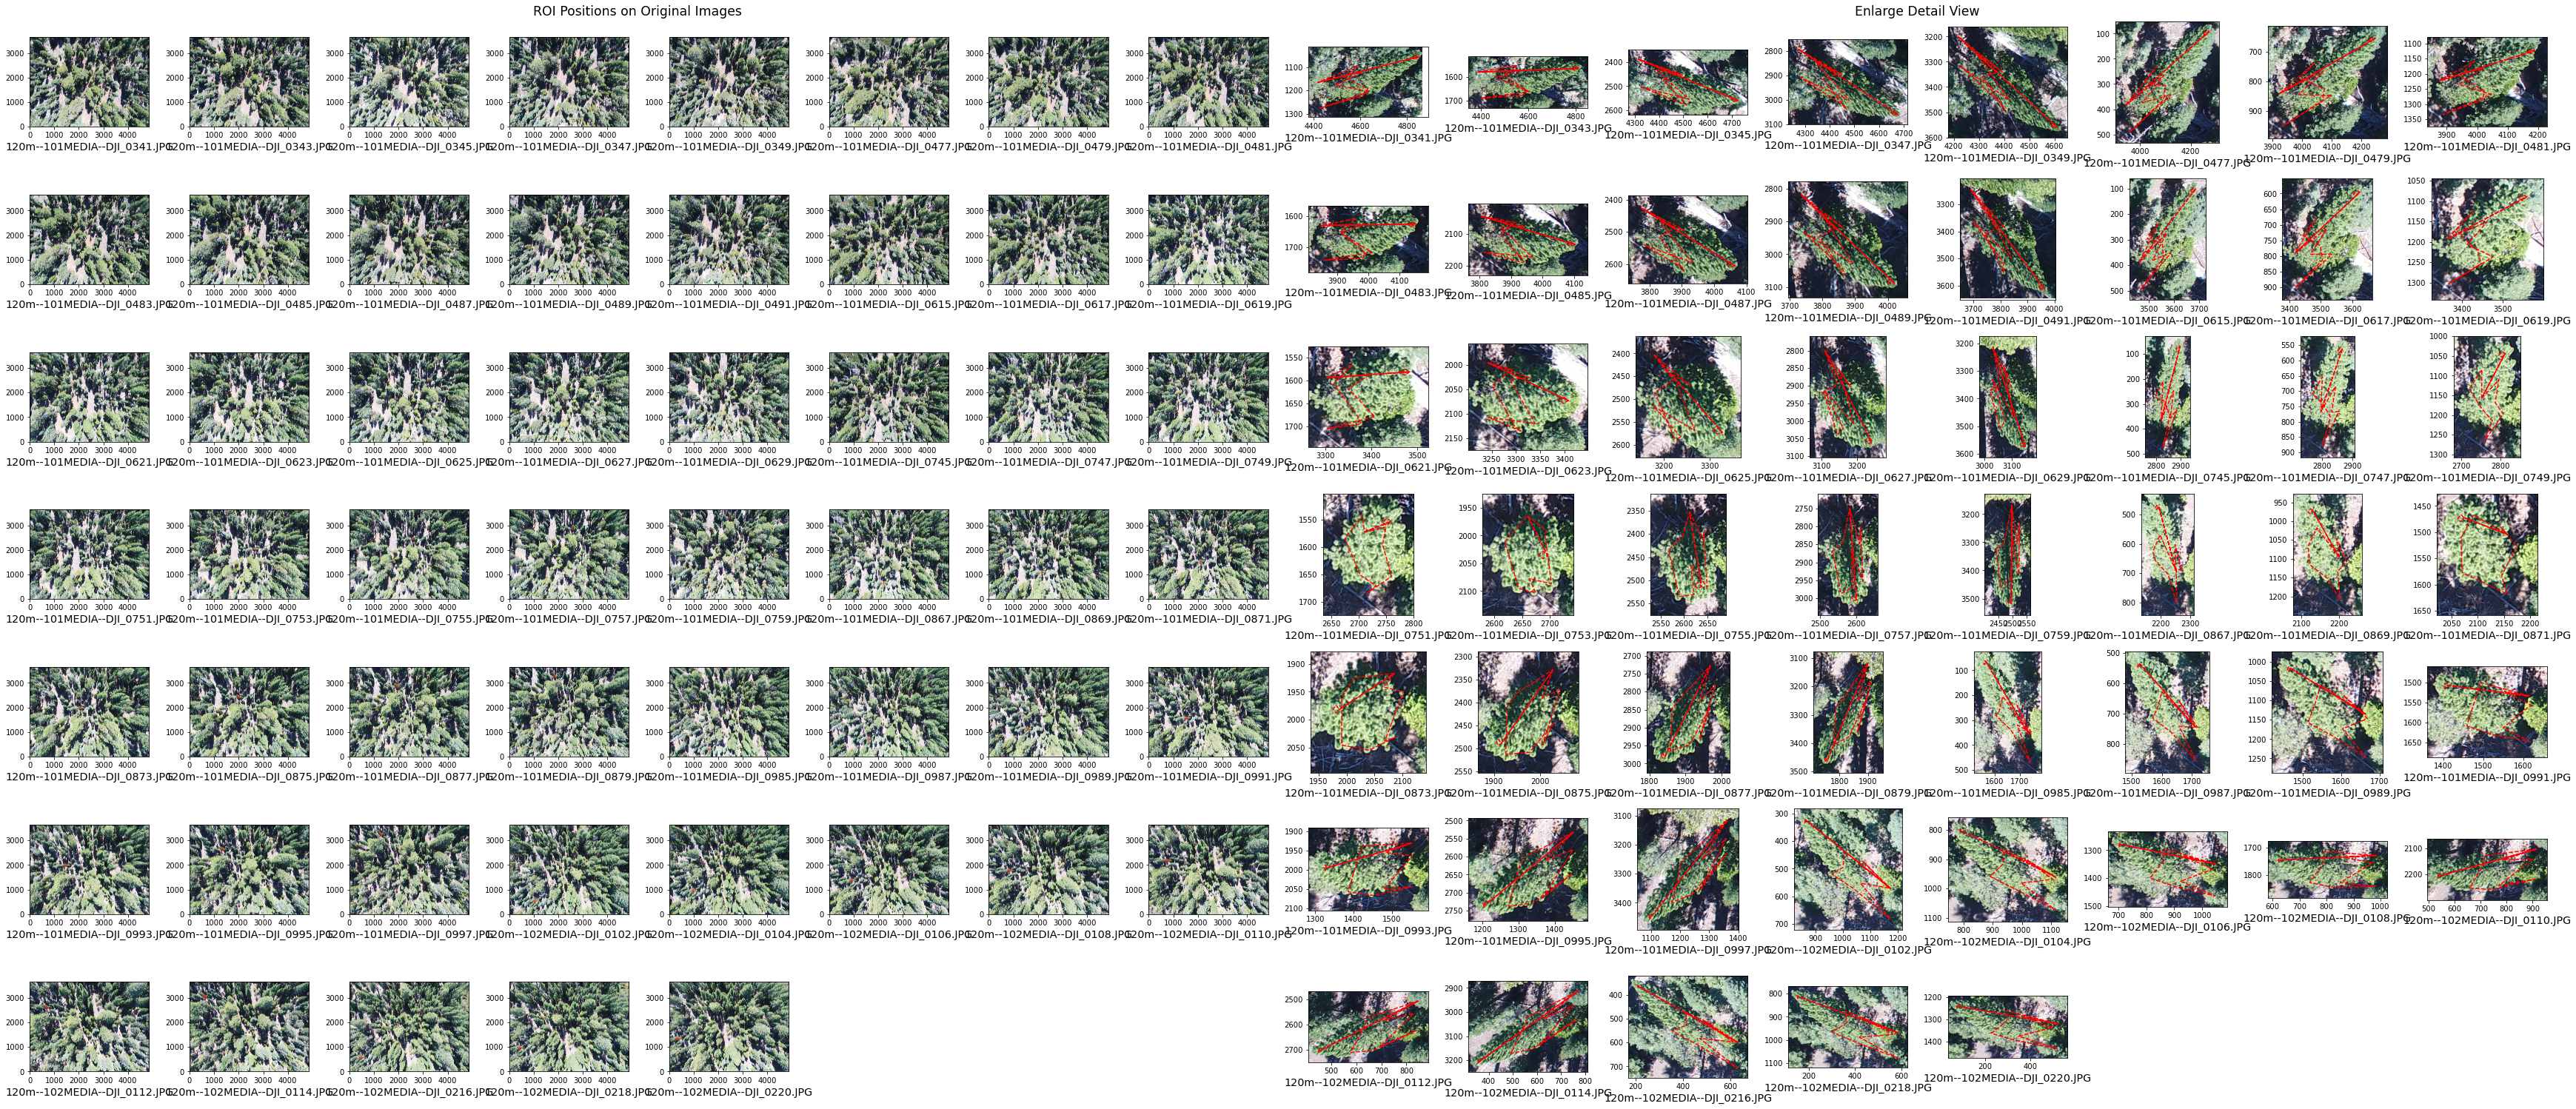

<Figure size 640x480 with 0 Axes>

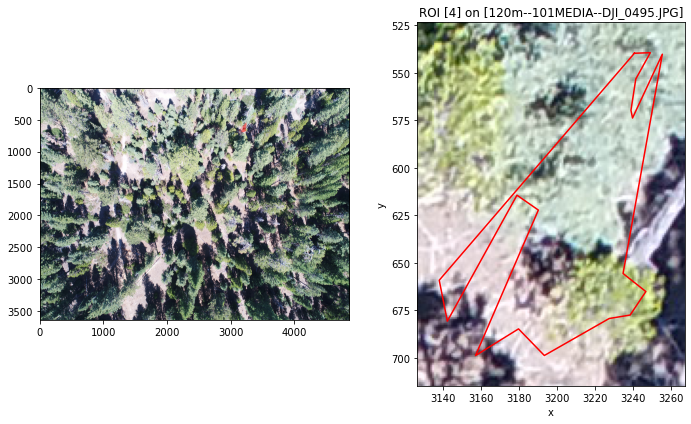

<Figure size 640x480 with 0 Axes>

In [7]:
## Optional for visualization: draw the location of a specified feature polygon on each photo containing it
ms.show_roi_on_img(img_dict_ms, "644", save_as="/ofo-share/str-disp_drone-data-partial/cropped-photos2/overview_644.png")

# or on a single photo
ms.show_roi_on_img(img_dict_ms, "4", "120m--101MEDIA--DJI_0495.JPG", save_as="/ofo-share/str-disp_drone-data-partial/cropped-photos2/overview_onephoto.png")

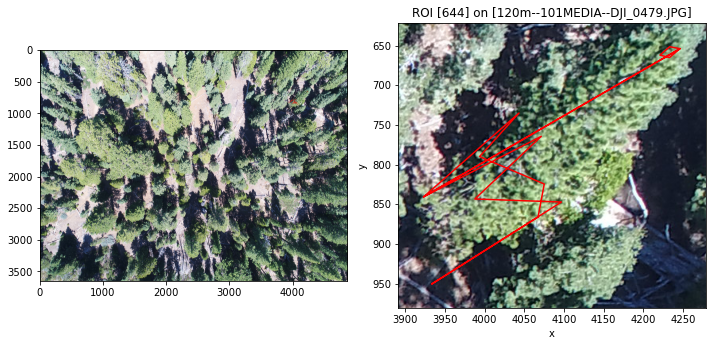

<Figure size 640x480 with 0 Axes>

In [8]:
ms.show_roi_on_img(img_dict_ms, "644", "120m--101MEDIA--DJI_0479.JPG")